In [161]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [304]:
df = pd.read_excel('C:\\Users\\intern-mrithubashini\\Desktop\\Chola_Internship_Work - Mrithubashini Sethuraman\\Scenario Analysis - Excel\\HCV_Data_Simulation.xlsx',sheet_name = "Station",index_col='Date',parse_dates=True)
df.index.freq='M'

In [305]:
df.tail()

,CPI: Housing,CPI: Core CPI index (excluding food group and fuel group),CPI: Food and beverages,CPI: Fuel & light,CPI: Urban,CPI: Rural,IIP: Infrastructure/ construction goods,Closing value of index: S & P B S E Sensex,WPI,Repo_Rate,rainfall_all,RuralWageMen,RuralWageWomen,Production,Sales,HCV_newdeliquency%
Date,,,,,,,,,,,,,,,,
2023-11-30,177.9,182.8,192.6,179.9,184.2,188.2,164.2,66988.44,153.1,6.5,34.6,412.6,291.8,99432,96521,0.087835
2023-12-31,176.9,182.9,191.2,180.2,183.6,187.6,180.3,72240.26,151.8,6.5,25.5,415.0,294.4,99432,96521,0.084663
2024-01-31,177.6,183.4,190.1,180.9,183.5,187.3,186.7,71752.11,151.2,6.5,7.2,417.0,295.8,122728,130121,0.084056
2024-02-29,178.5,183.9,190.3,180.7,184.0,187.4,179.8,72500.30,151.2,6.5,19.7,417.0,295.8,122728,130121,0.078919
2024-03-31,178.2,184.2,190.7,175.8,183.6,187.8,194.2,73651.35,151.8,6.5,28.5,417.0,295.8,96421,96521,0.060887


In [306]:
df.columns

Index(['CPI: Housing',
       'CPI: Core CPI index (excluding food group and fuel group)',
       'CPI: Food and beverages', 'CPI: Fuel & light', 'CPI: Urban',
       'CPI: Rural', 'IIP: Infrastructure/ construction goods',
       'Closing value of index: S & P B S E Sensex', 'WPI', 'Repo_Rate',
       'rainfall_all', 'RuralWageMen', 'RuralWageWomen', 'Production', 'Sales',
       'HCV_newdeliquency%'],
      dtype='object')

In [307]:
len(df.columns)

16

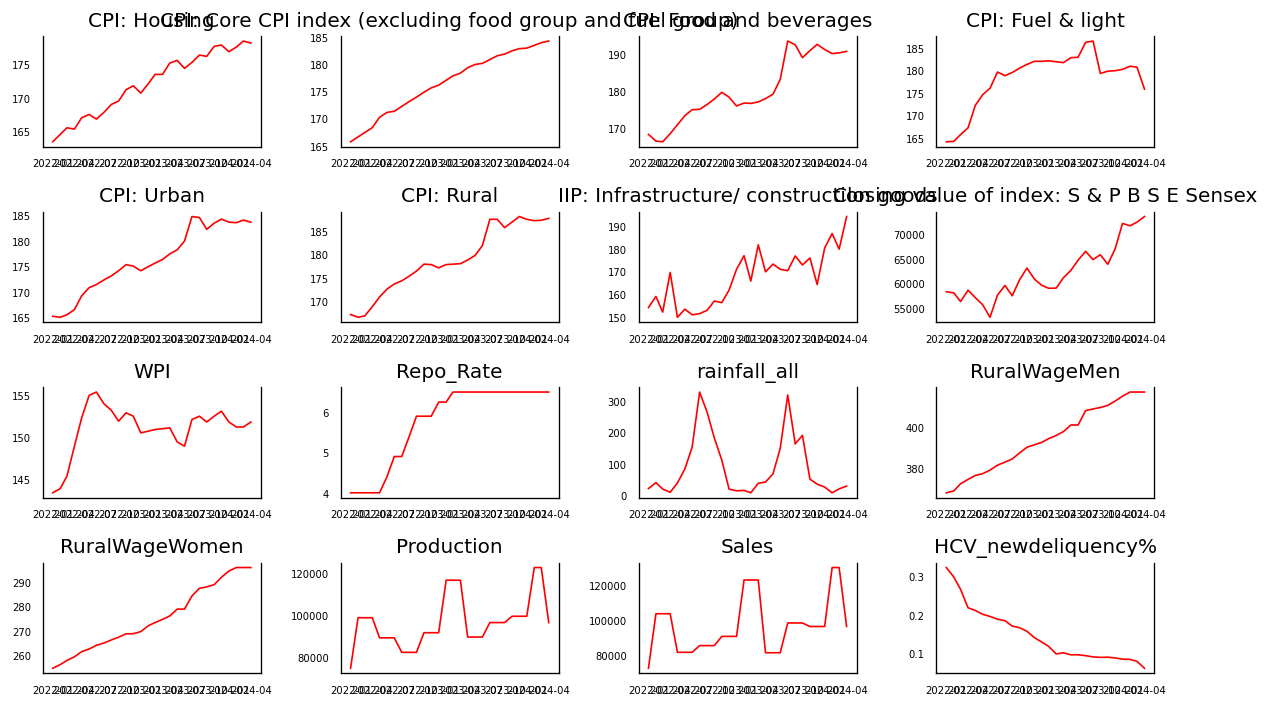

In [169]:
fig, axes = plt.subplots(nrows=4, ncols=4, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(df['HCV_newdeliquency%'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Delinquency")
plt.grid()
plt.show()

   After the above steps, where the plots are displayed, the following steps are to be followed
  
1. In required_cols, give your required columns from your dataset, you dataset might have 15 variables, out of which you may require 10, so mention them in required_cols

2. Since the target variable in the dataset I handled is HCV_New_Delinquency_%, I want to know the index number of itafter removing the columns which I don't require for my analysis (in this case - after removal of few variables, 13 is the index number)

3. Now, use MinMaxScaler to reduce your values to the range (0,1), mention the number of lags, and since my dataset, I had parsed the date (date is the index), num_features would start from 1 - 80% Training and 20% Testing

4. LSTM Layering - You may change the units accordingly - higher the better, input_shape(number_of_variables_to_be_taken,lags) in my dataset it is (14,20) since I had taken 14 variables in total and 20 lags

5. I am saving the data of LSTM in keras file, ensure that you create the keras file in the same file path of your excel/csv filepath

6. Epoch, Batch size - depends on your perception of the model

7. After performing LSTM - test loss, validation and training data is plotted, predictions are done and forecasting is done.

In [ ]:
#filter the columns by only the required_columns
required_cols = ['CPI: Core CPI index (excluding food group and fuel group)',
       'CPI: Fuel & light', 'CPI: Urban','Closing value of index: S & P B S E Sensex',
       'CPI: Rural', 'IIP: Infrastructure/ construction goods', 'WPI', 'Repo_Rate',
    "rainfall_all", 'RuralWageMen', 'RuralWageWomen', 'Production', 'Sales', 'HCV_newdeliquency%']
df = df[required_cols]
df.head()

In [325]:
index_no = df.columns.tolist().index('HCV_newdeliquency%')
print(index_no)

13


In [341]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Define sequence length and features
sequence_length = 20 # Number of time steps in each sequence (lags)
num_features = scaled_data.shape[1] 

hcv_column_index= 13 #Index number of target variable
# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length, hcv_column_index]  # 'hcv' column index
    sequences.append(seq)
    labels.append(label)
'''for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][13]  # 'hcv' column index
    sequences.append(seq)
    labels.append(label)'''

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (6, 20, 14)
Train Y shape: (6,)
Test X shape: (2, 20, 14)
Test Y shape: (2,)


In [356]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=150,input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(100, activation='relu', input_shape=(14,20)))
model.add(Dropout(0.2))  # Dropout for regularization

model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_72 (LSTM)                       │ (None, 20, 150)             │          99,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_72 (Dropout)                 │ (None, 20, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_73 (LSTM)                       │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_73 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,501 (779.30 KB)

 Trainable params: 199,501 (779.30 KB)

 Non-trainable params: 0 (0.00 B)

In [357]:
from keras.models import load_model
model.save('C:\\Users\\intern-mrithubashini\\Desktop\\Chola_Internship_Work - Mrithubashini Sethuraman\\Working Material - Python & R\\hcv.keras')

In [358]:
model_checkpoint = ModelCheckpoint('C:\\Users\\intern-mrithubashini\\Desktop\\Chola_Internship_Work - Mrithubashini Sethuraman\\Working Material - Python & R\\hcv.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=16,verbose=2,validation_data=(test_x,test_y))#callbacks= [model_checkpoint])

Epoch 1/100
1/1 - 8s - 8s/step - loss: 0.0076 - val_loss: 0.0669
Epoch 2/100
1/1 - 0s - 178ms/step - loss: 0.0341 - val_loss: 0.0198
Epoch 3/100
1/1 - 0s - 175ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 4/100
1/1 - 0s - 182ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 5/100
1/1 - 0s - 366ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 6/100
1/1 - 0s - 244ms/step - loss: 0.0095 - val_loss: 0.0018
Epoch 7/100
1/1 - 0s - 159ms/step - loss: 0.0028 - val_loss: 0.0042
Epoch 8/100
1/1 - 0s - 169ms/step - loss: 0.0012 - val_loss: 0.0083
Epoch 9/100
1/1 - 0s - 159ms/step - loss: 0.0016 - val_loss: 0.0119
Epoch 10/100
1/1 - 0s - 191ms/step - loss: 0.0015 - val_loss: 0.0134
Epoch 11/100
1/1 - 0s - 167ms/step - loss: 0.0026 - val_loss: 0.0123
Epoch 12/100
1/1 - 0s - 179ms/step - loss: 0.0019 - val_loss: 0.0107
Epoch 13/100
1/1 - 0s - 161ms/step - loss: 0.0011 - val_loss: 0.0088
Epoch 14/100
1/1 - 0s - 158ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 15/100
1/1 - 0s - 209ms/step - loss: 3.4

In [359]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model('C:\\Users\\intern-mrithubashini\\Desktop\\Chola_Internship_Work - Mrithubashini Sethuraman\\Working Material - Python & R\\hcv.keras')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)
     

C:\Users\intern-mrithubashini\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step - loss: 0.0014
Test Loss: 0.0014443829422816634


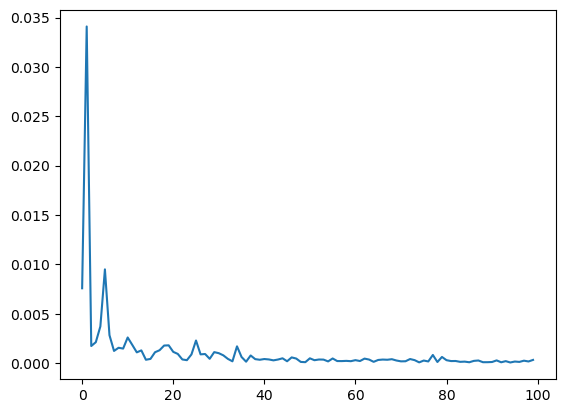

In [360]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

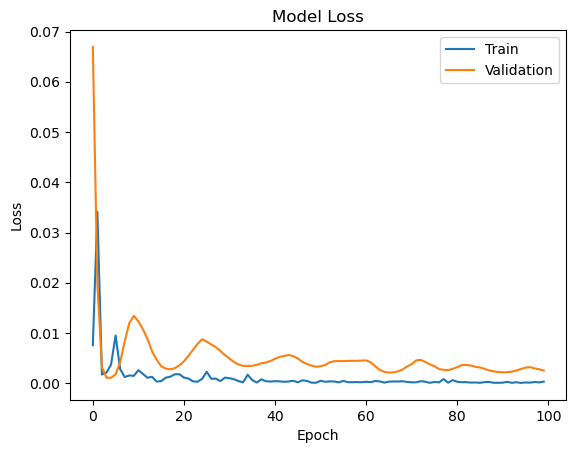

In [361]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [362]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
Mean Absolute Error (MAE): 0.03317487056733533
Mean Squared Error (MSE): 0.0014443828827464043
Root Mean Squared Error (RMSE): 0.038005037596960806


In [363]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,13]

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 14, axis=-1)# 14 is the total variables in the dataset taken after filtering the unwanted columns
predicted_temp = scaler.inverse_transform(prediction_copies)[:,13]# Ensure that you change the index number according to the target variable's index number

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [364]:
print(len(df.index[train_size + sequence_length:]))
print(len(true_temp))
print(len(predicted_temp))


2
2
2


In [365]:
results_df = pd.DataFrame({
    "Date": df.index[train_size + sequence_length:],  # Assuming 'Date' is your index column
    "Actuals": true_temp,
    "Predicted": predicted_temp
})

# Optionally, set 'Date' as index again (if needed)
results_df.set_index("Date", inplace=True)

# Display the DataFrame
print(results_df)

             Actuals  Predicted
Date                           
2024-02-29  0.078919   0.065358
2024-03-31  0.060887   0.064724


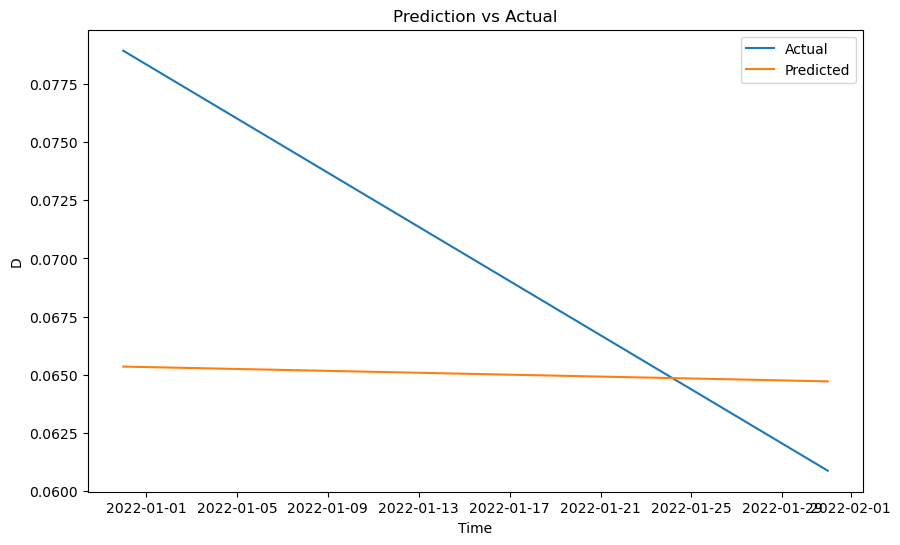

In [366]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(df.index[:2], true_temp[:2], label='Actual')
plt.plot(df.index[:2], predicted_temp[:2], label='Predicted')
plt.title('Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('D')
plt.legend()
plt.show()

In [367]:
# Number of time steps to forecast
forecast_steps = 3  # Assuming daily data and forecasting 2 months (30 days * 2)

# Extract the last 20 sequences from test data to start forecasting
last_sequences = test_x[-20:]  # Assuming test_x has enough data for this

# List to store forecasted values
forecasted_values = []

# Perform forecasting step by step
current_sequence = last_sequences[-1]  # Start with the last sequence in test_x

for _ in range(forecast_steps):
    # Reshape current_sequence to match model input shape
    current_sequence = current_sequence.reshape((1, sequence_length, num_features))
    
    # Predict the next value
    next_pred = best_model.predict(current_sequence)
    
    # Append prediction to forecasted_values
    forecasted_values.append(next_pred[0, 0])  # Assuming scalar output, adjust indexing if necessary
    
    # Update current_sequence to include the predicted value
    current_sequence = np.roll(current_sequence, -1, axis=1)  # Shift sequence one step forward
    current_sequence[0, -1] = next_pred  # Insert predicted value at the end

# Convert forecasted_values to numpy array and reshape to (forecast_steps, 1)
forecasted_values = np.array(forecasted_values).reshape(-1, 1)

# Inverse transform the forecasted values to get them in original scale
# Ensure the shape matches the original data used for scaling
forecasted_values_original_scale = scaler.inverse_transform(np.repeat(forecasted_values, num_features, axis=-1))[:, 13]

# Create a date range for the forecasted periods (assuming daily data)
forecast_dates = pd.date_range(start=df.index[-2] + pd.DateOffset(days=1), periods=forecast_steps, freq='M')

# Create a DataFrame to store results
forecast_results = pd.DataFrame({
    "Date": forecast_dates,
    "Forecasted Value": forecasted_values_original_scale
})

# Optionally, set 'Date' as index (if needed)
forecast_results.set_index("Date", inplace=True)

# Display the forecast results
print(forecast_results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
            Forecasted Value
Date                        
2024-03-31          0.064724
2024-04-30          0.062548
2024-05-31          0.060676


In [368]:
import pandas as pd
import os

# Assuming results_df and forecast_results are already defined and filled with data

# Define the file path
excel_file_path = 'C:\\Users\\intern-mrithubashini\\Pictures\\master_sheet_HCV.xlsx'

# Check if the file already exists
file_exists = os.path.isfile(excel_file_path)

# Create ExcelWriter object
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a' if file_exists else 'w') as writer:
    
    # Write results_df to a new sheet 'predicted_and_forecast'
    results_df.to_excel(writer, sheet_name='predicted', startrow=0, index=True)
    
    # Calculate the starting row for forecast_results
    start_row_forecast = results_df.shape[0] + 3  # Start after results_df with 2 rows space
    
    # Write forecast_results to the same Excel sheet, leaving two rows blank
    forecast_results.to_excel(writer, sheet_name='forecast', startrow=0, index=True)

# Notify the user
print(f"Data saved successfully to '{excel_file_path}' with sheet 'predicted_and_forecast'.")


Data saved successfully to 'C:\Users\intern-mrithubashini\Pictures\master_sheet_HCV.xlsx' with sheet 'predicted_and_forecast'.
